# Problem:
- Predicting no. of travellers
- DataSet taxi
- Model: Simple RNN , LSTM , GRU

# Getting Data

In [1]:
#Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Data set
df =pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\ny_taxi_data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  16100 non-null  object 
 1   vendor_id           16100 non-null  int64  
 2   pickup_datetime     16100 non-null  object 
 3   dropoff_datetime    16100 non-null  object 
 4   passenger_count     16100 non-null  int64  
 5   pickup_longitude    16100 non-null  float64
 6   pickup_latitude     16100 non-null  float64
 7   dropoff_longitude   16100 non-null  float64
 8   dropoff_latitude    16100 non-null  float64
 9   store_and_fwd_flag  16100 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
# Getting required data
data = df['passenger_count'].values #we are predicting passenger count, so using only thet coloum
data

array([1, 1, 1, ..., 1, 1, 1])

### Scaling data using min max scaler

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1,1))
data.ndim

2

In [7]:
# Train & Test  data
sequence_length = 5
sequence = []
target = []
# creting a loop to store sequence and target

for i in range(len(data) - sequence_length):
    sequence.append(data[i:i+sequence_length])
    target.append(data[i+sequence_length])

sequence = np.array(sequence)
target = np.array(target)

X_train , X_test , y_train , y_test = train_test_split(sequence , target , test_size = 0.3 , random_state = 42)
    

### Build & Train model

In [8]:
# Simple RNN and building model

model_rnn = keras.Sequential(name = 'RNN') 
model_rnn.add(keras.layers.SimpleRNN(100, activation = 'relu', input_shape = (X_train.shape[1],1))) 
model_rnn.add(keras.layers.Dense(1)) 
model_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
# model training
model_rnn.fit(X_train , y_train , batch_size = 32 , verbose = 0 , epochs = 100)

In [10]:
# Simple LSTM and building model

model_lstm = keras.Sequential(name = 'LSTM') 
model_lstm.add(keras.layers.LSTM(100, activation = 'relu', input_shape = (X_train.shape[1],1))) 
model_lstm.add(keras.layers.Dense(1)) 
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
# model training
model_lstm.fit(X_train , y_train , batch_size = 32 , verbose = 0 , epochs = 100)

In [12]:
# Simple GRU and building model

model_gru = keras.Sequential(name = 'GRU') 
model_gru.add(keras.layers.GRU(100, activation = 'relu', input_shape = (X_train.shape[1],1))) 
model_gru.add(keras.layers.Dense(1)) 
model_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# model training
model_gru.fit(X_train , y_train , batch_size = 32 , verbose = 0 , epochs = 100)

In [14]:
# Model Evaluation
#Creating a custom function  to evaluate model

def evaluate_model(model , X_test , y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0] , X_test.shape[1],1)
    y_predict = model.predict(X_test_reshaped)
    y_predict = scaler.inverse_transform(y_predict).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
    mse = mean_squared_error(y_test , y_predict)
    return mse

In [15]:
mse_rnn= evaluate_model(model_rnn,X_test,y_test)
mse_lstm= evaluate_model(model_lstm,X_test,y_test)
mse_gru= evaluate_model(model_gru,X_test,y_test)

print (f'RNN Mean Sqaured Error: {mse_rnn}')
print (f'LSTM Mean Sqaured Error: {mse_lstm}')
print (f'GRU Mean Sqaured Error: {mse_gru}')

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
RNN Mean Sqaured Error: 1.7429227221471941
LSTM Mean Sqaured Error: 1.6941249013990933
GRU Mean Sqaured Error: 1.694901536793647


In [16]:
# Make prediction

y_predict_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1],1))
y_predict_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1],1)) 
y_predict_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1],1))
y_predict_rnn

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.12976989],
       [0.20539515],
       [0.09667131],
       ...,
       [0.12976989],
       [0.1489903 ],
       [0.11926889]], dtype=float32)

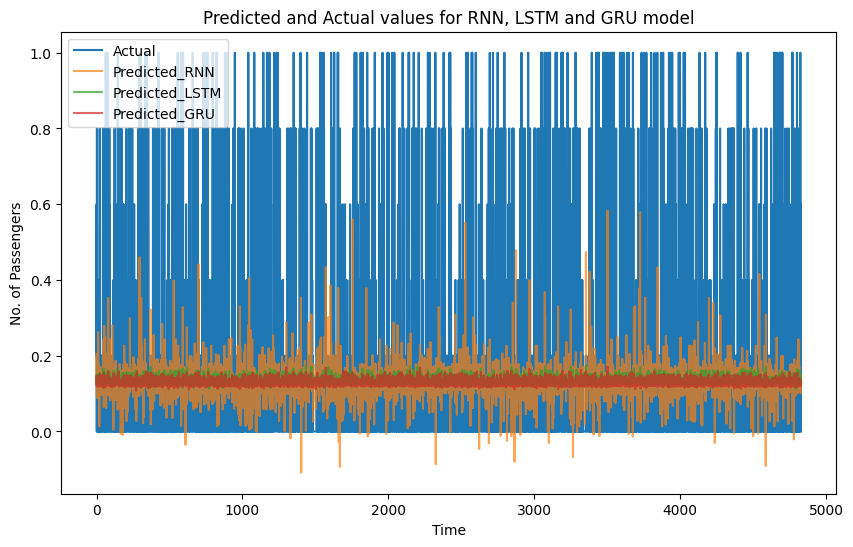

In [17]:
# Visualize prediction and Actual value 
plt.figure(figsize = (10,6)) 
plt.plot(y_test, label = 'Actual') 
plt.plot(y_predict_rnn, label = 'Predicted_RNN', alpha = 0.7) 
plt.plot(y_predict_lstm, label = 'Predicted_LSTM', alpha = 0.7) 
plt.plot(y_predict_gru, label = 'Predicted_GRU', alpha = 0.7) 
plt.legend() 
plt.xlabel('Time') 
plt.ylabel('No. of Passengers') 
plt.title('Predicted and Actual values for RNN, LSTM and GRU model')
plt.show()